In [16]:
import sympy as sp
sp.init_printing()

N, n, k, i, Xi = sp.symbols('N n k i X_i')
x_ = sp.symbols('x1:n')

### #1
В сумке Кати N похожих ключей; только один из них подходит к двери от дома. Когда Катя вечером приходит домой, она наугад достаёт ключ из сумки и пытается открыть им дверь. Если ключ не подходит, она кладёт его обратно в сумку и снова достаёт наугад следующий. Каким законом задаётся распределение номера попытки X, с которой Кате удаётся открыть дверь?

In [17]:
L = 1/N * (1 - 1/N)**(k - 1)
L

Геометрическое распределение

### #2

Представим, что у нас есть данные $X_1,\dots{},X_n$ за n дней о том, с какой попытки Кате удалось открыть дверь.

Запишите функцию правдоподобия такой выборки и возьмите от неё логарифм.

Какое выражение у вас получилось?

---

Т.к. номер попытки k меняется каждый день, то для данной задачи она будет выглядеть как:

In [18]:
1/N * (1 - 1/N)**(Xi - 1)

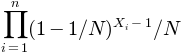

In [6]:
prod = sp.Product(1/N * (1 - 1/N)**(Xi - 1) , (i, 1, n))
prod

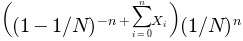

In [7]:
LP = sp.product(1/N, (i, 1, n)) * (1-1/N)**(sp.Sum(Xi, (i, 0, n)) - n)
LP

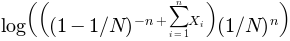

In [8]:
LL = sp.ln((1/N)**n * (1-1/N)**(sp.Sum(Xi, (i, 1, n)) - n))
LL

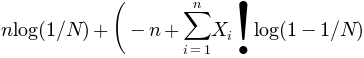

In [9]:
LL2 = n*sp.ln(1/N) + (sp.Sum(Xi, (i, 1, n)) - n) * sp.ln(1 - 1/N)
LL2

За последние пять дней Кате удавалось открыть дверь с восьмой, двенадцатой, седьмой, шестой и снова двенадцатой попыток; давайте найдём оценку максимального правдоподобия для N. Подставьте эти числа в выражение для логарифма правдоподобия, продифференцируйте его по N и приравняйте к нулю. Из полученного уравнения выразите N. Итак, \hat{N}_{ОМП}=

In [10]:
att = [8, 12, 7, 6, 12]
att_sum = sum(att)
days = len(att)
att_sum, days

In [11]:
LL3 = days*sp.ln(1/N) + (att_sum - days) * sp.ln(1 - 1/N)
LL3

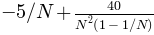

In [12]:
rs = sp.diff(LL3, N)
rs

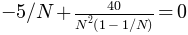

In [13]:
eq = sp.Eq(rs, 0)
eq

In [14]:
sp.solve(eq, N)